# Modelo 15x15



In [3]:
import sys 
sys.path.append("..")

from aby_functions import *

/media/jhonnyrv/20F40883F4085E02/ModelActual/ModelOro/abyModel/AbyModel/fifteenModel


2023-12-05 10:44:09.223349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-05 10:44:09.224231: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-12-05 10:44:09.772297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gra

MSE:
    MSE train:	 0.00351
    MSE val:	 0.00740
    MSE test:	 0.00673

Gráfico de errores



   Promedio de errores menores a 0: -15.171932905148243
   Promedio de errores mayores a 0: 22.19997649436773

Grafico: datos reales vs datos predichos (entrenamiento, validacion y prueba)


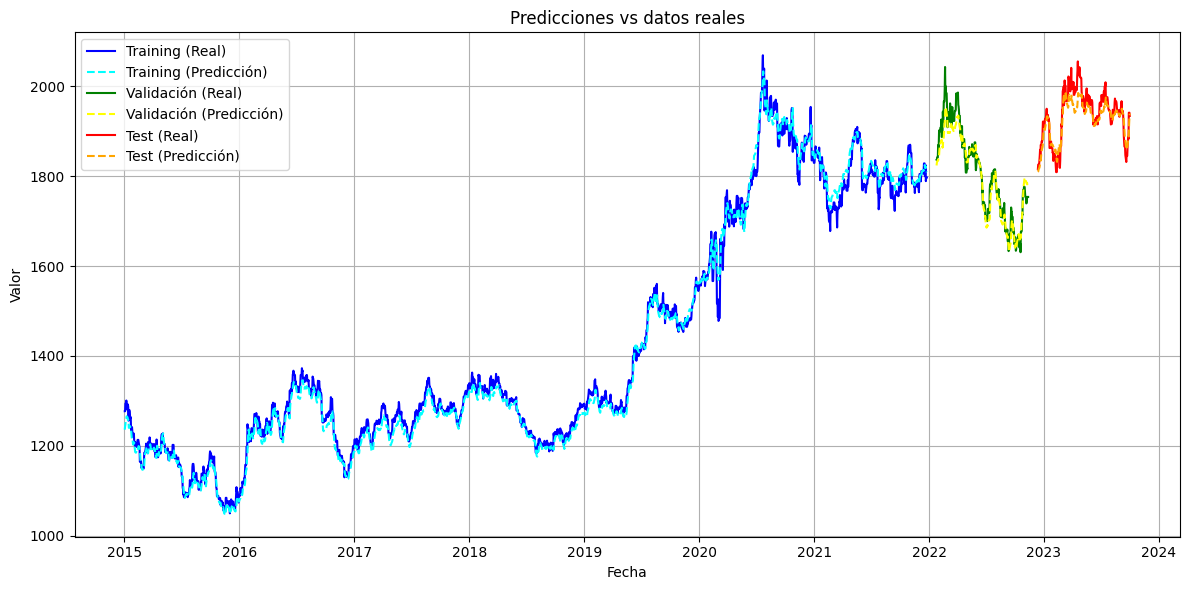


Grafico: datos reales vs datos predichos (prueba)


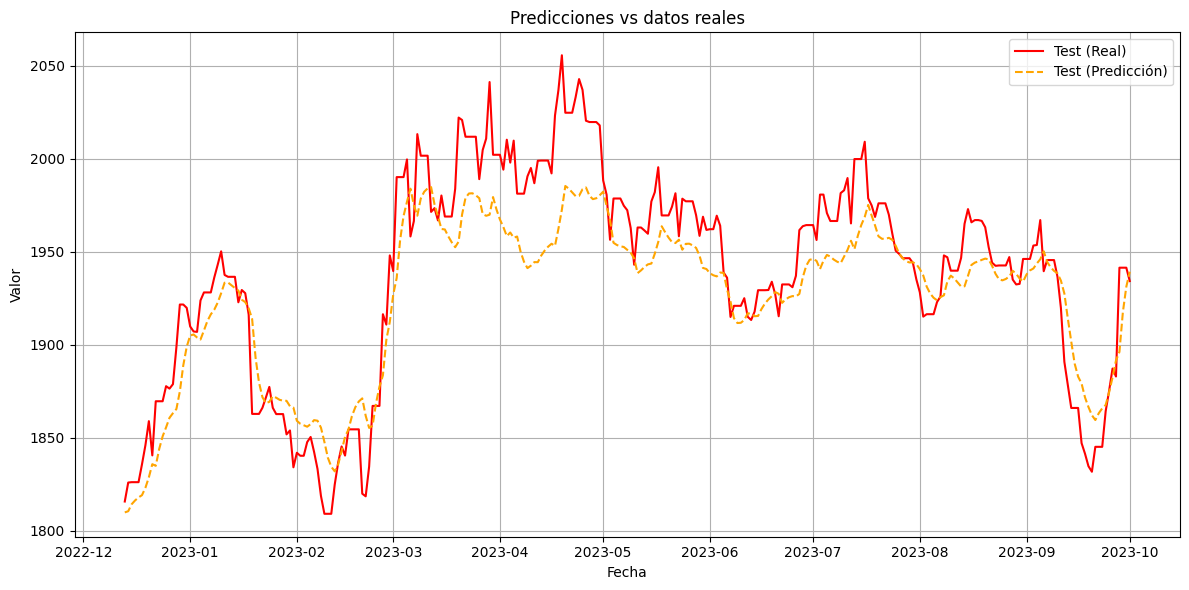

In [4]:


aby_model = AbyModel(
    
                type_model = 15


                )

## Estandarizar valores entre 1 y 3

In [34]:
data_train_pred, y_data_train_, y_data_validation_, data_validation_pred, y_data_test_, data_test_pred = standar_value_1_3(aby_model.data_train_pred, 
                                                                                                                          aby_model.y_data_train_, 
                                                                                                                          aby_model.y_data_validation_, 
                                                                                                                          aby_model.data_validation_pred, 
                                                                                                                          aby_model.y_data_test_, 
                                                                                                                          aby_model.data_test_pred)

In [35]:
def visualization_prediction_standar_values2(aby_model, data_train_pred, y_data_train_, y_data_validation_, data_validation_pred, y_data_test_, data_test_pred):
    plt.figure(figsize=(12, 6))

    # Gráfica de entrenamiento
    plt.plot(aby_model.date_train[:aby_model.data_train_pred[:, :].shape[0]], y_data_train_[:, 0], color='blue', label="Training (Real)")
    plt.plot(aby_model.date_train[:aby_model.data_train_pred[:, :].shape[0]], data_train_pred[:, 0], '--', color='cyan', label="Training (Predicción)")

    # Gráfica de validación
    plt.plot(aby_model.date_validation[:aby_model.data_validation_pred[:, :].shape[0]], y_data_validation_[:, 0], color='green', label="Validación (Real)")
    plt.plot(aby_model.date_validation[:aby_model.data_validation_pred[:, :].shape[0]], data_validation_pred[:, 0], '--', color='yellow', label="Validación (Predicción)")

    # Gráfica de prueba
    plt.plot(aby_model.date_test[:aby_model.data_test_pred[:, :].shape[0]], y_data_test_[:, 0], color='red', label="Test (Real)")
    plt.plot(aby_model.date_test[:aby_model.data_test_pred[:, :].shape[0]], data_test_pred[:, 0], '--', color='orange', label="Test (Predicción)")

    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.title("Predicciones vs datos reales")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show() 
    
    plt.figure(figsize=(12, 6))

    # Gráfica de prueba
    plt.plot(aby_model.date_test[:aby_model.data_test_pred[:, :].shape[0]], y_data_test_[:, 0], color='red', label="Valor del oro estandarizado en $")
    plt.plot(aby_model.date_test[:aby_model.data_test_pred[:, :].shape[0]], data_test_pred[:, 0], '--', color='orange', label="Valor de ABY predicho en $")

    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.title("Predicciones vs datos reales")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()   

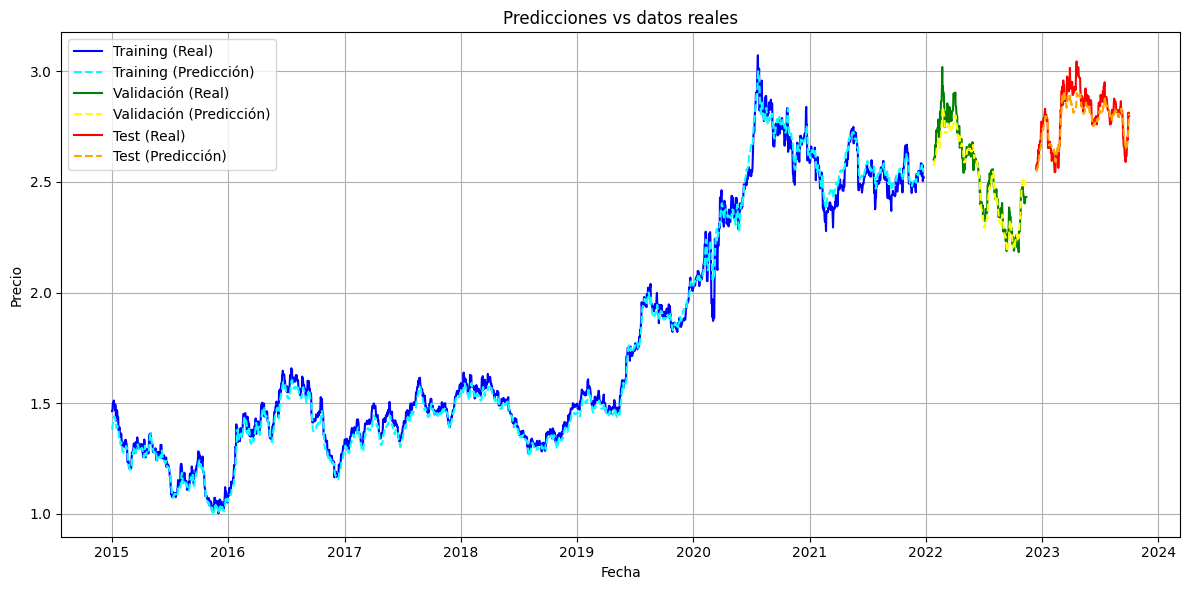

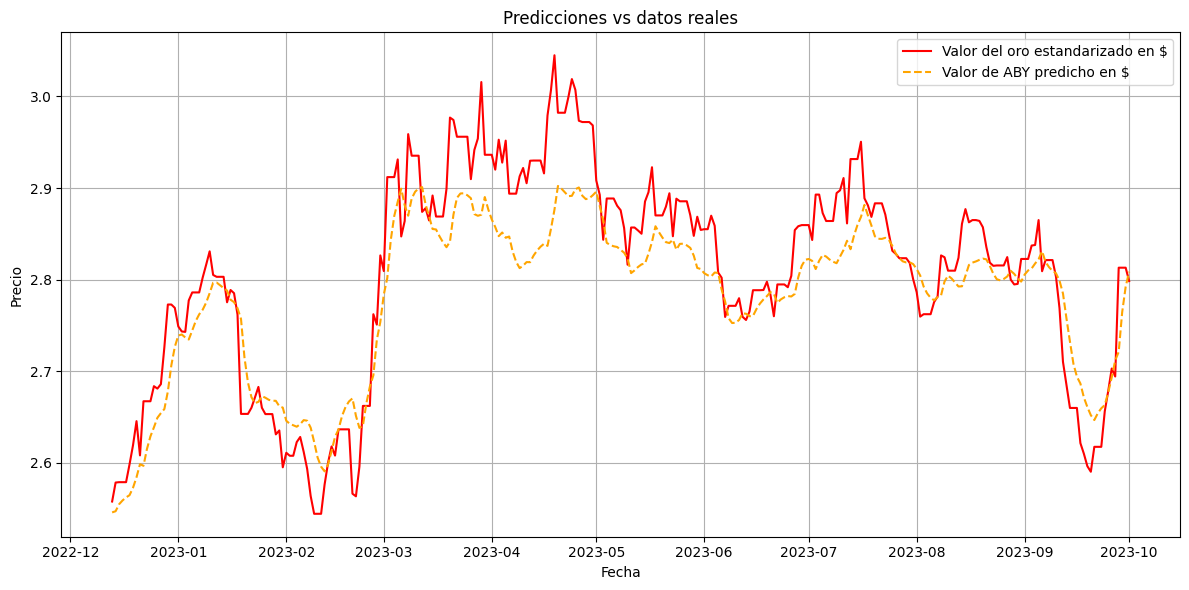

In [36]:
visualization_prediction_standar_values2(aby_model, data_train_pred, y_data_train_, y_data_validation_, data_validation_pred, y_data_test_, data_test_pred)

## Aby en DEG

In [11]:
df_deg = pd.read_excel("../aby_price_2023.xlsx")[["Fecha", "Dolar en deg"]]

In [14]:
# Crear el objeto MinMaxScaler con el rango deseado
scaler = MinMaxScaler(feature_range=(1, 3))

# Ajustar a los datos y luego transformarlos
data_test_real = scaler.fit_transform(aby_model.y_data_test_[19:])
# Ajustar a los datos y luego transformarlos
data_test_pred = scaler.transform(aby_model.data_test_pred[19:] )

In [19]:
df_price = pd.DataFrame({"Fecha":list(aby_model.date_test[:aby_model.data_test_pred[:, :].shape[0]][19:]),
             "Precio del oro en $ (real - estandarizado)":list(data_test_real[:, 0]),
             "Precio del oro en $ (predicho - estandarizado)":list(data_test_pred[:, 0])})

In [24]:
df_deg = df_deg.merge(df_price, on="Fecha")

In [29]:
for i in df_deg.index:
    df_deg.loc[i, "Precio del oro en DEG (real - estandarizado)"] = df_deg.loc[i, "Precio del oro en $ (real - estandarizado)"] * float(df_deg.loc[i, "Dolar en deg"])
    df_deg.loc[i, "Precio de ABY en DEG (predicho - estandarizado)"] = df_deg.loc[i, "Precio del oro en $ (predicho - estandarizado)"] * float(df_deg.loc[i, "Dolar en deg"])

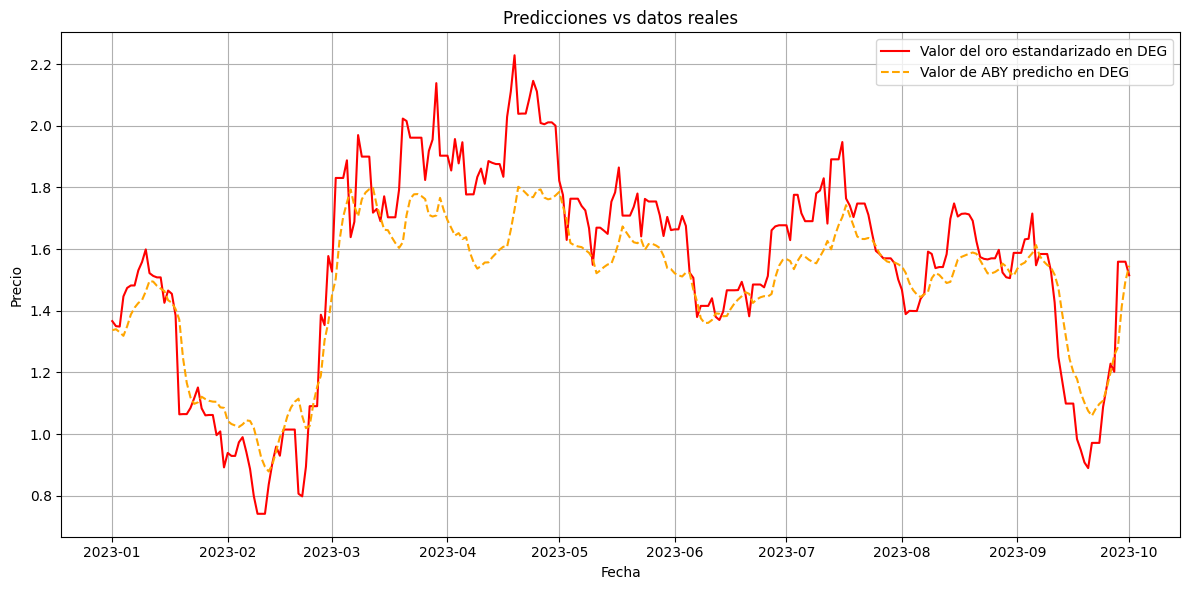

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [39]:
plt.figure(figsize=(12, 6))

# Gráfica de prueba
plt.plot(df_deg.Fecha, df_deg["Precio del oro en DEG (real - estandarizado)"], color='red', label="Valor del oro estandarizado en DEG")
plt.plot(df_deg.Fecha, df_deg["Precio de ABY en DEG (predicho - estandarizado)"], '--', color='orange', label="Valor de ABY predicho en DEG")

plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.title("Predicciones vs datos reales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 

plt.figure(figsize=(12, 6))